In [13]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, learning_curve, cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
import preprocessing
import mlp

In [14]:
df = preprocessing.column_selection("data/train.csv")
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Married
0,0,3,1,22.000000,1,0,7.2500,0.0,1.0
1,1,1,0,38.000000,1,0,71.2833,1.0,1.0
2,1,3,0,26.000000,0,0,7.9250,0.0,0.0
3,1,1,0,35.000000,1,0,53.1000,0.0,1.0
4,0,3,1,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0.0,1.0
887,1,1,0,19.000000,0,0,30.0000,0.0,0.0
888,0,3,0,29.699118,1,2,23.4500,0.0,0.0
889,1,1,1,26.000000,0,0,30.0000,1.0,1.0


In [16]:
'''df = pd.read_csv("train.csv")
df["Age"].fillna(df["Age"].mean(), inplace=True)
#df["Survived"].value_counts().plot.bar()
df["Fare"].fillna(df["Fare"].mean(), inplace=True)
# mapping features to numerical values
d1 = {"female": 0, "male": 1}
d2 = {"S": 0, "C": 1, "Q": 2}

# data resampling ?
df["Sex"] = df["Sex"].map(d1)
df["Embarked"] = df["Embarked"].map(d2)
#df.head()


mapping = {"Mr": 1, "Miss": 0, "Mrs": 1}
df["Married"] = df["Name"].str.extract("([A-Za-z]+)\.")
df["Married"] = df["Married"].map(mapping)
print(df["Married"].value_counts())
df["Married"] = df["Married"].fillna(value=1)
"""
for i in range(len(df["Married"])):             # extracting married column from their names. Thanks to Jicheng Li
    if df["Married"][i] == "NaN":
        df["Married"][i] ="""               # filling missing values with most common label?
print(df["Married"].value_counts())
'''

1.0    642
0.0    182
Name: Married, dtype: int64
1.0    709
0.0    182
Name: Married, dtype: int64


## Try Resampling and filling missing values

Try Find Correlations between data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Married
838,839,1,3,"Chip, Mr. Chang",1,32.000000,0,0,1601,56.4958,NaN,0.0,1.0
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.000000,1,0,13502,77.9583,D7,0.0,0.0
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",0,39.000000,1,1,17421,110.8833,C68,1.0,1.0
36,37,1,3,"Mamee, Mr. Hanna",1,29.699118,0,0,2677,7.2292,NaN,1.0,1.0
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",0,29.699118,1,0,367230,15.5000,NaN,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,0.0,1.0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,29.1250,NaN,2.0,1.0
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0.0,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,0.0


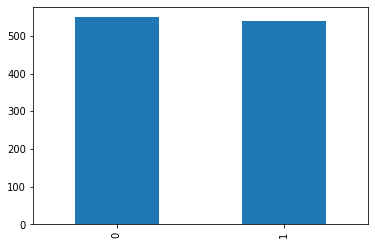

In [7]:
'''# original data
temp_df = df[df['Survived'] == 1]               # get 'dead' samples
other_df = df[df["Survived"] != 1]
temp_df_upsampled = resample(temp_df, n_samples=540, random_state=123, replace=True)
df = pd.concat([temp_df_upsampled, other_df])
df["Survived"].value_counts().plot.bar()
df
'''

In [15]:
#extracted = df.drop(columns="PassengerId", axis=1).drop(columns="Name", axis=1).drop(columns="Cabin", axis=1).drop(columns="Ticket")
# find a way to deal with missing values: cut them off or take average value from its neighbors
#extracted = extracted.dropna()
X = df.drop(columns="Survived", axis=1)
X
#sns.pairplot(data=X, diag_kind="kde")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Married
0,3,1,22.000000,1,0,7.2500,0.0,1.0
1,1,0,38.000000,1,0,71.2833,1.0,1.0
2,3,0,26.000000,0,0,7.9250,0.0,0.0
3,1,0,35.000000,1,0,53.1000,0.0,1.0
4,3,1,35.000000,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0.0,1.0
887,1,0,19.000000,0,0,30.0000,0.0,0.0
888,3,0,29.699118,1,2,23.4500,0.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,1.0


In [16]:
Y = df["Survived"]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [85]:
'''# original data
df["Survived"].value_counts().plot.bar()
temp_df = df[df['Survived'] == 1]               # get 'dead' samples
other_df = df[df["Survived"] != 1]
temp_df_upsampled = resample(temp_df, random_state=123, replace=True)
df = pd.concat([temp_df_upsampled, other_df])
df'''

'# original data\ndf["Survived"].value_counts().plot.bar()\ntemp_df = df[df[\'Survived\'] == 1]               # get \'dead\' samples\nother_df = df[df["Survived"] != 1]\ntemp_df_upsampled = resample(temp_df, random_state=123, replace=True)\ndf = pd.concat([temp_df_upsampled, other_df])\ndf'

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# rescale data in trainnig stage (decrease sensitivity of the model)            make sure inputs are in the range of activision function (so MLP could learn from features)
sc = StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

nn = mlp.neuralNetwork(X_train, Y_train)

'''MLP = MLPClassifier(hidden_layer_sizes=(6, 2), max_iter=2000, activation="relu", solver="adam")     # increasing layer to three could lead to overfitting
MLP.fit(trainX_scaled, Y_train)'''

'MLP = MLPClassifier(hidden_layer_sizes=(6, 2), max_iter=2000, activation="relu", solver="adam")     # increasing layer to three could lead to overfitting\nMLP.fit(trainX_scaled, Y_train)'

In [20]:
y_pred = nn.predict(testX_scaled)

print("Accuracy on train data: {:.2f}".format(accuracy_score(Y_train, nn.predict(trainX_scaled))))
print('Accuracy on test data: {:.2f}'.format(accuracy_score(Y_test, y_pred)))
print(classification_report(y_pred, Y_test))

Accuracy on train data: 0.85
Accuracy on test data: 0.80
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       120
           1       0.68      0.74      0.71        58

    accuracy                           0.80       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.81      0.80      0.81       178



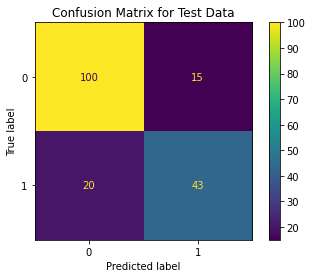

In [21]:
cm = confusion_matrix(Y_test, y_pred, labels=nn.classes_)
fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn.classes_)
fig.plot()
plt.title("Confusion Matrix for Test Data")
plt.show()

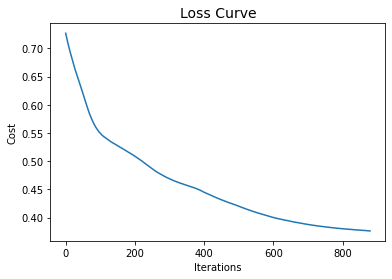

In [22]:
plt.plot(nn.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [39]:
'''train_sz, train_score, test_score, fit_time, _ = learning_curve(MLP, trainX_scaled, Y_train)
plt.plot(train_sz, train_score)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.show()'''

'train_sz, train_score, test_score, fit_time, _ = learning_curve(clf, trainX_scaled, Y_train)\nplt.plot(train_sz, train_score)\nplt.xlabel("Training Samples")\nplt.ylabel("Score")\nplt.title("Learning Curve")\nplt.show()'